<img src='https://www.digitalhouse.com/ar/logo-DH.png' align='left' width=35%/>


## **GRUPO 6.**


 - **Gerardo Burgos [gerarburgos1987@gmail.com]**
 - **Pablo Marcelo Ferrero [pabloferrero1991@gmail.com]**
 - **Bautista Alonso Marangone [bautialonsom@gmail.com]**
 - **Mauro Montrasi [mauriciomontrasi@gmail.com]**
---

In [ ]:
#importamos todas las librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importamos datos
data_location = "../Data/properati.csv"
data = pd.read_csv(data_location)
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [ ]:
 data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

## * Nulls*

In [ ]:
#Corroboramos Nulls, faltantes.
cant_nulls= data.isnull().sum().sort_values(ascending=False)
print("\TOP TEN\ Cantidad de Nulls=\n",cant_nulls.head(10))

\TOP TEN\ Cantidad de Nulls=
 floor                  113321
expenses               106958
rooms                   73830
price_usd_per_m2        52603
lon                     51550
lat-lon                 51550
lat                     51550
surface_total_in_m2     39328
price_per_m2            33562
currency                20411
dtype: int64


In [ ]:
#lo vemos en porcentaje
cant_nulos_por_campo = data.apply(lambda x: x.isnull().sum(), axis=0)
cant_registros = data.shape[0]
porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
print("\TOP TEN\ % de Nulls=\n",(porc_nulos_por_campo.round(2).sort_values(ascending=False).head(10)))

\TOP TEN\ % de Nulls=
 floor                  93.48
expenses               88.23
rooms                  60.91
price_usd_per_m2       43.39
lon                    42.53
lat-lon                42.53
lat                    42.53
surface_total_in_m2    32.44
price_per_m2           27.69
currency               16.84
dtype: float64


## * Trabajamos Rooms* Parte1-regex

In [ ]:
# copy
dfr = data.copy()

#paso a mayusculas para regularizar la busqueda.
dfr['title'] = dfr.title.str.upper()

#importo regular expres

import re
patron1 = '(?P<g1>\d+)\s*(?P<amb>AMB)\w*'
patron1_regex = re.compile(patron1)
match1 = dfr.title.apply(lambda x : x if x is np.NaN else patron1_regex.search(x))
mask1_notnull = match1.notnull()
dfr.loc[mask1_notnull, "from_tit"] = match1[mask1_notnull].apply(lambda x: x.group('g1'))

#reemplazo cuando encuentro el numero escrito
patron2 = '(?P<gm>\sMONO)\s*(?P<ambientes>AMB)\w*'
patron2_regex = re.compile(patron2)
match2 = dfr.title.apply(lambda x : x if x is np.NaN else patron2_regex.search(x))
mask2_notnull = match2.notnull()
dfr.loc[mask2_notnull, "from_tit"] = match2[mask2_notnull].apply(lambda x: int(1))
patron3 = '(?P<gd>\sDOS)\s*(?P<ambientes>AMB)\w*'
patron3_regex = re.compile(patron3)
match3 = dfr.title.apply(lambda x : x if x is np.NaN else patron3_regex.search(x))
mask3_notnull = match3.notnull()
dfr.loc[mask3_notnull, "from_tit"] = match3[mask3_notnull].apply(lambda x: int(2))
patron7 = '(?P<gt>\sTRES)\s*(?P<ambientes>AMB)\w*'
patron7_regex = re.compile(patron7)
match7 = dfr.title.apply(lambda x : x if x is np.NaN else patron7_regex.search(x))
mask7_notnull = match7.notnull()
dfr.loc[mask7_notnull, "from_tit"] = match7[mask7_notnull].apply(lambda x: int(3))

#seguimos cons description
dfr['description'] = dfr.description.str.upper()

patron4 = '(?P<g4>\d+)\s*(?P<amb>AMB)\w*'
patron4_regex = re.compile(patron4)
match4 = dfr.description.apply(lambda x : x if x is np.NaN else patron4_regex.search(x))
mask4_notnull = match4.notnull()
dfr.loc[mask4_notnull, "from_des"] = match4[mask4_notnull].apply(lambda x: x.group('g4'))

#reemplazo cuando encuentro el numero escrito
patron5 = '(?P<gm>\sMONO)\s*(?P<ambientes>AMB)\w*'
patron5_regex = re.compile(patron5)
match5 = dfr.description.apply(lambda x : x if x is np.NaN else patron5_regex.search(x))
mask5_notnull = match5.notnull()
dfr.loc[mask5_notnull, "from_des"] = match5[mask5_notnull].apply(lambda x: int(1))
patron6 = '(?P<gd>\sDOS)\s*(?P<ambientes>AMB)\w*'
patron6_regex = re.compile(patron6)
match6 = dfr.description.apply(lambda x : x if x is np.NaN else patron6_regex.search(x))
mask6_notnull = match6.notnull()
dfr.loc[mask6_notnull, "from_des"] = match6[mask6_notnull].apply(lambda x: int(2))
patron7 = '(?P<gt>\sTRES)\s*(?P<ambientes>AMB)\w*'
patron7_regex = re.compile(patron7)
match7 = dfr.title.apply(lambda x : x if x is np.NaN else patron7_regex.search(x))
mask7_notnull = match7.notnull()
dfr.loc[mask7_notnull, "from_des"] = match7[mask7_notnull].apply(lambda x: int(3))

dfr[["description","title","rooms", "from_des","from_tit"]].head(15)

#dfr.description.iloc[11] codificar de nuevo la regex para evitar datos intrusos.


,description,title,rooms,from_des,from_tit
0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,NaN,2,2
1,VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...,VENTA DEPTO 2 DORM. A ESTRENAR 7 E/ 36 Y 37 ...,NaN,NaN,NaN
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,NaN,2,2
3,PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...,PH 3 AMB. CFTE. RECICLADO,NaN,3,3
4,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,NaN,NaN,2
5,"CASA EN EL PERÍMETRO DEL BARRIO 338, UBICADA E...","CASA BARRIO 338. SOBRE CALLE 3 DE CABALLERÍA, ...",NaN,NaN,NaN
6,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",NaN,NaN,NaN
7,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,NaN,1,1
8,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",NaN,2,2
9,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,NaN,NaN,NaN


In [ ]:
dfr.rooms.fillna(value = dfr.from_des, inplace=True)
dfr.rooms.fillna(value = dfr.from_tit, inplace=True)
dfr[["description","title","rooms", "from_des","from_tit"]].head(5)

,description,title,rooms,from_des,from_tit
0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,2,2,2
1,VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...,VENTA DEPTO 2 DORM. A ESTRENAR 7 E/ 36 Y 37 ...,NaN,NaN,NaN
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,2,2,2
3,PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...,PH 3 AMB. CFTE. RECICLADO,3,3,3
4,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,2,NaN,2


In [ ]:
#dumies para ambientes me ayuda a

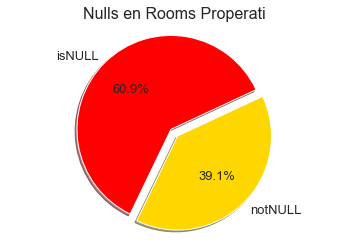

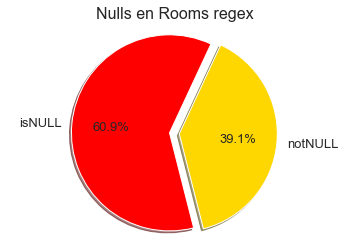

In [ ]:
plt.rcParams.update({'font.size': 13})
labels=("")
nor = data["rooms"].notnull().sum()
nir = data["rooms"].isnull().sum()
nulls = [nor, nir]
labels = 'isNULL', 'notNULL'
sizes = [nir, nor]
explode = (0, 0.1)
fig1, ax8 = plt.subplots()
ax8.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=25, colors = ["red","Gold"])
ax8.axis('equal')
plt.title("Nulls en Rooms Properati", fontsize=16)
# el otro
nor = dfr["rooms"].notnull().sum()
nir = dfr["rooms"].isnull().sum()
nulls = [nor, nir]
labels = 'isNULL', 'notNULL'
sizes = [nir, nor]
explode = (0, 0.1)
fig1, ax8 = plt.subplots()
ax8.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=65, colors = ["red","Gold"])
ax8.axis('equal')
plt.title("Nulls en Rooms regex", fontsize=16)
plt.show()

In [ ]:
#elimino las filas de extracción
dfr.drop(["from_tit", "from_des"],axis=1, inplace=True)

In [ ]:
#Contamos la reducción de Nulls
(data.rooms.isnull().sum()/data.rooms.shape[0] * 100).round(2)
(dfr.rooms.isnull().sum()/dfr.rooms.shape[0] * 100).round(2)
data.rooms.isnull().sum(), dfr.rooms.isnull().sum()

(73830, 47265)

In [ ]:
dfr.rooms.isnull().sum()
dfr.rooms.dropna(inplace=True)
dfr.rooms.astype(int)
dfr.rooms.shape, data.rooms.shape

((73955,), (121220,))

In [ ]:
#dfr.head(3)

In [ ]:
data_cap = dfr.loc[:,["property_type","place_name","place_with_parent_names","state_name","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","rooms"]]
data_cap.shape

In [ ]:
mask_capital = data["state_name"] == "Capital Federal"
data_capital = data_cap.loc[mask_capital, :]
data_capital.head(3)


## * Recortamos CABA*

In [ ]:
data_cap = dfr.loc[:,["property_type","place_name","place_with_parent_names","state_name","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","rooms"]]
data_cap.shape

(121220, 9)

In [ ]:
mask_capital = data["state_name"] == "Capital Federal"
data_capital = data_cap.loc[mask_capital, :]
data_capital.head(3)

,property_type,place_name,place_with_parent_names,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,55.0,40.0,1127.272727,2
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,55.0,55.0,1309.090909,2
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,NaN,NaN,NaN,3


In [ ]:
#Explotamos place_withnames para tener todas la ubicaciones
data_capital.shape
location_xtrac = data_capital.place_with_parent_names.str.split("|", expand=True)
location_xtrac.head(4)

,0,1,2,3,4,5
0,,Argentina,Capital Federal,Mataderos,,None
2,,Argentina,Capital Federal,Mataderos,,None
3,,Argentina,Capital Federal,Liniers,,None
7,,Argentina,Capital Federal,Belgrano,,None


In [ ]:
data_capital.shape

(32316, 9)

In [ ]:
data_caba = pd.concat([data_capital, location_xtrac], axis=1, sort=False)
data_caba.sample(5, random_state=383)

,property_type,place_name,place_with_parent_names,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,0,1,2,3,4,5
77790,apartment,Villa Luro,|Argentina|Capital Federal|Villa Luro|,Capital Federal,184000.0,78.0,70.0,2358.974359,3,,Argentina,Capital Federal,Villa Luro,,None
107698,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,NaN,88.0,75.0,NaN,4,,Argentina,Capital Federal,Palermo,,None
77319,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,Capital Federal,170000.0,78.0,74.0,2179.487179,4,,Argentina,Capital Federal,Villa Crespo,,None
118048,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,Capital Federal,226088.0,86.0,69.0,2628.930233,3,,Argentina,Capital Federal,Villa Crespo,,None
59634,apartment,Centro / Microcentro,|Argentina|Capital Federal|Centro / Microcentro|,Capital Federal,73000.0,NaN,28.0,NaN,1,,Argentina,Capital Federal,Centro / Microcentro,,None


In [ ]:
cant_nulos_por_campo = data_caba.apply(lambda x: x.isnull().sum(), axis=0)
cant_registros = data_caba.shape[0]
porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
porc_nulos_por_campo.round(2).head(5)

property_type               0.00
place_name                  0.00
place_with_parent_names     0.00
state_name                  0.00
price_aprox_usd            10.21
dtype: float64

In [ ]:
umbral= 16991
data_clean_col_with_many_null = data_caba.dropna(axis = 1, thresh=umbral)
print(data_caba.shape)
print(data_clean_col_with_many_null.shape)

(32316, 15)
(32316, 14)


In [ ]:
cant_nulos_por_campo.sort_values(ascending=False)

5                          31118
price_usd_per_m2            8882
rooms                       6525
surface_total_in_m2         5879
price_aprox_usd             3298
surface_covered_in_m2       2339
4                           1297
3                              0
2                              0
1                              0
0                              0
state_name                     0
place_with_parent_names        0
place_name                     0
property_type                  0
dtype: int64

In [ ]:
data_caba_clean = data_caba.drop(["place_with_parent_names", "state_name", "place_name",0, 1, 2, 5, 4, ], axis=1)      
data_caba_clean.head()

,property_type,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,3
0,PH,62000.0,55.0,40.0,1127.272727,2,Mataderos
2,apartment,72000.0,55.0,55.0,1309.090909,2,Mataderos
3,PH,95000.0,NaN,NaN,NaN,3,Liniers
7,apartment,138000.0,45.0,40.0,3066.666667,1,Belgrano
8,apartment,195000.0,65.0,60.0,3000.000000,2,Belgrano


In [ ]:
#Contamos cuantos unidades x barrio
data_caba_clean[3].value_counts().head(10)

Palermo          4083
Belgrano         2992
Caballito        2273
Villa Urquiza    1629
Recoleta         1547
Flores           1354
Villa Crespo     1331
                 1297
San Telmo        1216
Almagro          1165
Name: 3, dtype: int64

-- # recordar en dfclean
Revisar mostrar la fila vacía.

In [ ]:
#vemos los precios aproximados.
data_caba_clean["price_aprox_usd"].value_counts(ascending=False)

120000.0    344
130000.0    310
110000.0    309
135000.0    307
115000.0    303
           ... 
517711.0      1
226087.0      1
135200.0      1
104850.0      1
102400.0      1
Name: price_aprox_usd, Length: 5294, dtype: int64

In [ ]:
dfclean = data_caba_clean.rename(index=str, columns={"property_type": "Tipo_Propiedad", "price_aprox_usd": "Precio_aprox_usd", "surface_total_in_m2":"Superficie_total_m2","surface_covered_in_m2" : "Superficie_cubierta_m2", "price_usd_per_m2":"Precio_usdxm2", "rooms":"Ambientes",3:"Barrio"})
dfclean = dfclean[["Barrio","Tipo_Propiedad","Ambientes","Superficie_cubierta_m2", "Superficie_total_m2", "Precio_usdxm2", "Precio_aprox_usd"]]
dfclean.head()

,Barrio,Tipo_Propiedad,Ambientes,Superficie_cubierta_m2,Superficie_total_m2,Precio_usdxm2,Precio_aprox_usd
0,Mataderos,PH,2,40.0,55.0,1127.272727,62000.0
2,Mataderos,apartment,2,55.0,55.0,1309.090909,72000.0
3,Liniers,PH,3,NaN,NaN,NaN,95000.0
7,Belgrano,apartment,1,40.0,45.0,3066.666667,138000.0
8,Belgrano,apartment,2,60.0,65.0,3000.000000,195000.0


## *Correlacion*

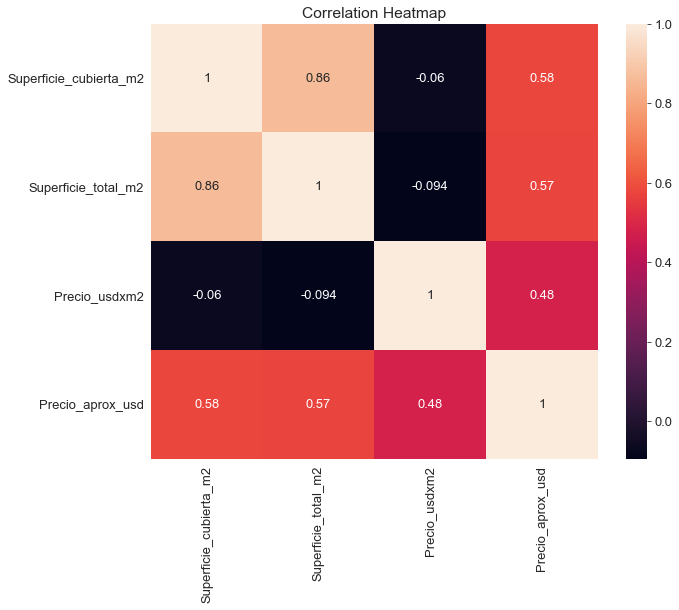

In [ ]:
dfcleancorr = dfclean.dropna()

plt.figure(figsize=(10,8))
sns.heatmap(dfcleancorr.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Instantanea DataFrame data  Nulls
cant_nulos_por_campo = data.apply(lambda x: x.isnull().sum(), axis=0)
cant_registros = data.shape[0]
porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
print("\TOP TEN\ % de Nulls=\n",(porc_nulos_por_campo.round(2).sort_values(ascending=False)))

# Instantanea DataFrame dfclean Nulls
cant_nulos_por_campo2 = dfclean.apply(lambda x: x.isnull().sum(), axis=0)
cant_registros2 = dfclean.shape[0]
porc_nulos_por_campo2 = 100 * cant_nulos_por_campo2 / cant_registros2
print("\TOP TEN\ % de Nulls=\n",(porc_nulos_por_campo2.round(2).sort_values(ascending=False)))

\TOP TEN\ % de Nulls=
 floor                         93.48
expenses                      88.23
rooms                         60.91
price_usd_per_m2              43.39
lon                           42.53
lat-lon                       42.53
lat                           42.53
surface_total_in_m2           32.44
price_per_m2                  27.69
currency                      16.84
price_aprox_usd               16.84
price_aprox_local_currency    16.84
price                         16.84
surface_covered_in_m2         16.42
geonames_id                   15.44
image_thumbnail                2.57
place_name                     0.02
title                          0.00
properati_url                  0.00
description                    0.00
state_name                     0.00
country_name                   0.00
place_with_parent_names        0.00
property_type                  0.00
operation                      0.00
Unnamed: 0                     0.00
dtype: float64
\TOP TEN\ % de Nulls=
 Pre

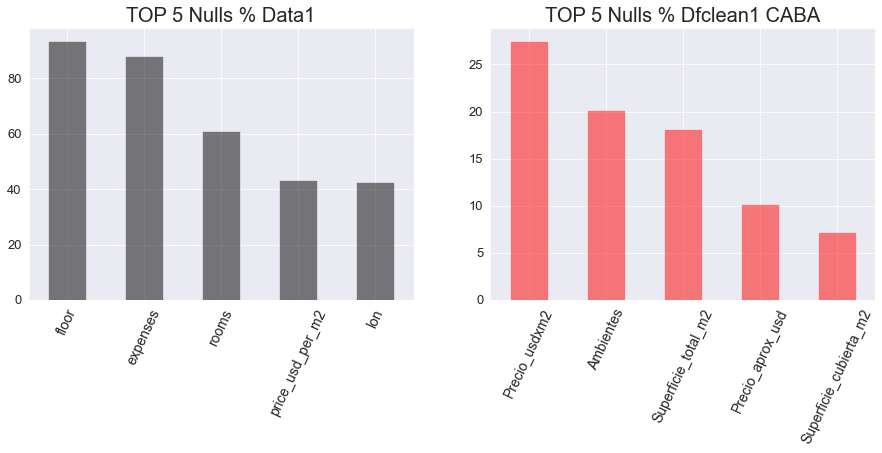

In [ ]:
#vemos avance de limpieza nulls
a1 = plt.figure(figsize=(40,5))
a1 = sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8}) 
a1 = plt.subplot2grid((1,5),(0,0))
a1 = porc_nulos_por_campo.round(2).sort_values(ascending=False).head(5).plot(kind="bar", alpha=0.5, color="k")
a1.set_title("TOP 5 Nulls % Data1", fontsize=20)
a1.set_xticklabels(a1.get_xticklabels(), rotation=65,  fontsize=14)
a1.set_xticklabels
a1 = plt.subplot2grid((1,5),(0,1))
a2 = porc_nulos_por_campo2.round(2).sort_values(ascending=False).head(5).plot(kind="bar", alpha=0.5, color="r")
a2.set_title("TOP 5 Nulls % Dfclean1 CABA", fontsize=20)
a2.set_xticklabels(a2.get_xticklabels(), rotation=65,  fontsize=14)
a2.set_xticklabels
plt.show()

In [ ]:
ascer = dfclean.Barrio.sort_values(ascending=True,na_position="first" )

<bound method _AxesBase.set_xticklabels of <AxesSubplot:title={'center':'Histograma de cantidad de unidades x Barrios'}, xlabel='Barrio', ylabel='count'>>

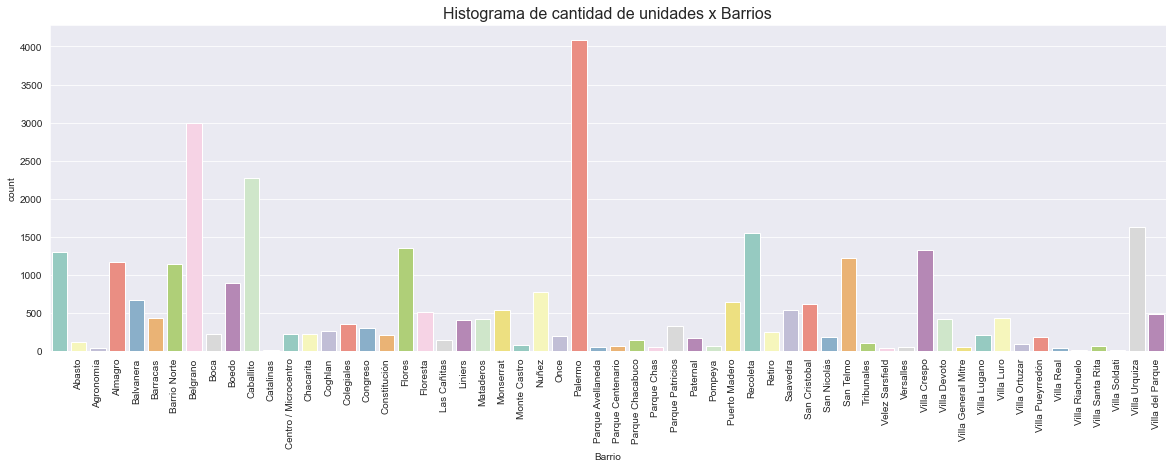

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")  
ax = sns.countplot(x= ascer,data=dfclean, palette="Set3")
ax.set_title('Histograma de cantidad de unidades x Barrios', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels

## *Tipo de propiedad*

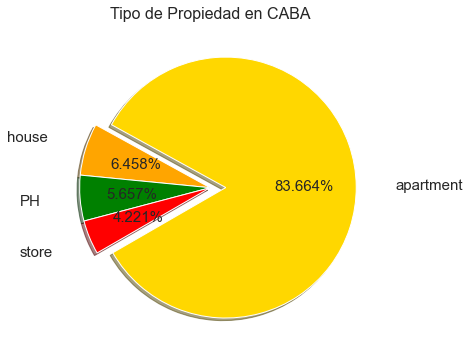

In [ ]:
#revisamos la variable para CABA
plt.rcParams.update({'font.size': 15})
labels=("")
dfclean["Tipo_Propiedad"].value_counts().plot(kind='pie', label = labels, labeldistance=1.3, figsize=(6,6),explode = (0.12, 0, 0, 0 ), autopct='%1.3f%%',shadow=True, startangle=210, colors = ["Gold", "orange", "green", "red"])
plt.title("Tipo de Propiedad en CABA", fontsize=16)
plt.show()

In [ ]:
# Contamos ocurrencias tipo de propiedad
print("La columna Tipo_Propiedad tiene",dfclean.Tipo_Propiedad.value_counts().size,"categorias que son \n", dfclean.Tipo_Propiedad.value_counts(dropna=False), "\n y 0 registros Nan")

La columna Tipo_Propiedad tiene 4 categorias que son 
 apartment    27037
house         2087
PH            1828
store         1364
Name: Tipo_Propiedad, dtype: int64 
 y 0 registros Nan


In [ ]:
#Creamos dummies con los tipos de Propieadd
dummy = pd.get_dummies(dfclean["Tipo_Propiedad"], drop_first=True)
dummy

,apartment,house,store
0,0,0,0
2,1,0,0
3,0,0,0
7,1,0,0
8,1,0,0
...,...,...,...
121160,1,0,0
121209,1,0,0
121215,1,0,0
121217,1,0,0


In [ ]:
#concatenemos dummies
dfclean3 = pd.concat([dfclean,dummy],axis=1)
dfclean3

,Barrio,Tipo_Propiedad,Ambientes,Superficie_cubierta_m2,Superficie_total_m2,Precio_usdxm2,Precio_aprox_usd,apartment,house,store
0,Mataderos,PH,2,40.0,55.0,1127.272727,62000.0,0,0,0
2,Mataderos,apartment,2,55.0,55.0,1309.090909,72000.0,1,0,0
3,Liniers,PH,3,NaN,NaN,NaN,95000.0,0,0,0
7,Belgrano,apartment,1,40.0,45.0,3066.666667,138000.0,1,0,0
8,Belgrano,apartment,2,60.0,65.0,3000.000000,195000.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
121160,Belgrano,apartment,NaN,NaN,157.0,2611.464968,410000.0,1,0,0
121209,Belgrano,apartment,NaN,NaN,157.0,2611.464968,410000.0,1,0,0
121215,Belgrano,apartment,3,93.0,113.0,7699.115044,870000.0,1,0,0
121217,Villa Urquiza,apartment,1,39.0,46.0,2858.695652,131500.0,1,0,0


In [ ]:
#dummies de barrio
dummy2 = pd.get_dummies(dfclean3["Barrio"], drop_first=True)
dummy2

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121209,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121215,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#concatenamos y creamos dfclean4 Dataframe
dfclean4 = pd.concat([dfclean3,dummy2],axis=1)
dfclean4

,Barrio,Tipo_Propiedad,Ambientes,Superficie_cubierta_m2,Superficie_total_m2,Precio_usdxm2,Precio_aprox_usd,apartment,house,store,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,Mataderos,PH,2,40.0,55.0,1127.272727,62000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mataderos,apartment,2,55.0,55.0,1309.090909,72000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Liniers,PH,3,NaN,NaN,NaN,95000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Belgrano,apartment,1,40.0,45.0,3066.666667,138000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Belgrano,apartment,2,60.0,65.0,3000.000000,195000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,Belgrano,apartment,NaN,NaN,157.0,2611.464968,410000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121209,Belgrano,apartment,NaN,NaN,157.0,2611.464968,410000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121215,Belgrano,apartment,3,93.0,113.0,7699.115044,870000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121217,Villa Urquiza,apartment,1,39.0,46.0,2858.695652,131500.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


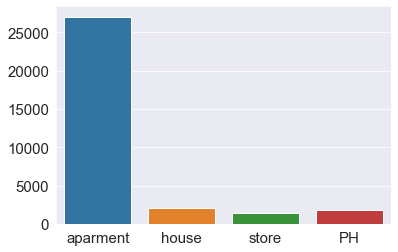

In [ ]:
#Creamos dummies con los tipos de Propieadd
dum1 = pd.get_dummies(dfclean["Tipo_Propiedad"])
sns.set_style('darkgrid')
x = ["aparment", "house", "store", "PH"]
y = [dum1.apartment.sum(), dum1.house.sum(), dum1.store.sum(), dum1.PH.sum()]
sns.barplot(x, y)
plt.show()

In [ ]:
dum2.Agronomía.sum()

41

<bound method _AxesBase.set_xticklabels of <AxesSubplot:title={'center':'Histograma de cantidad de unidades x Barrios'}, xlabel='Barrio', ylabel='count'>>

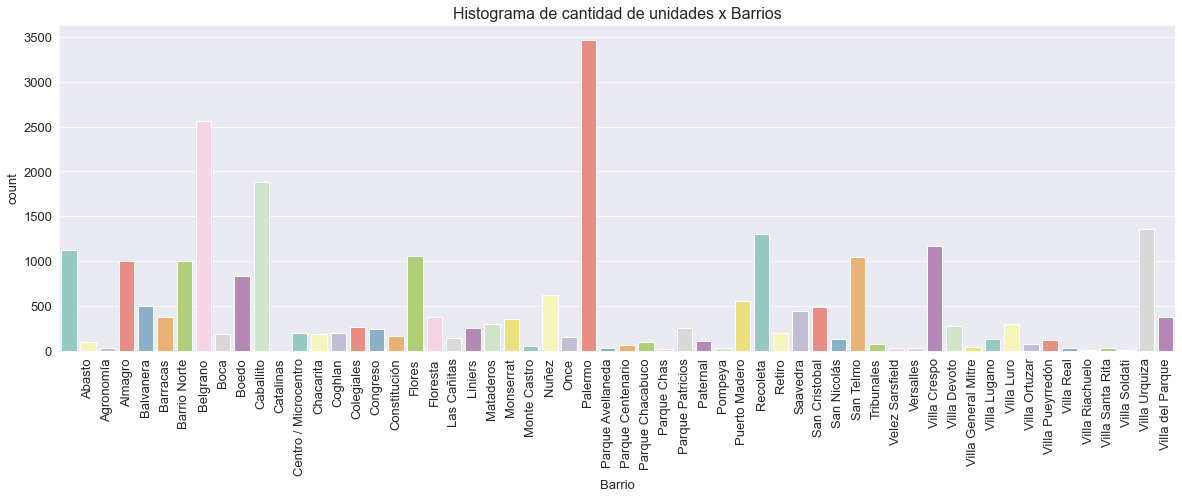

In [ ]:
#imitamos columnas dummies para graficar
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")  
ax = sns.countplot(x=dfclean4.Barrio.sort_values(),data=dfclean, palette="Set3")
ax.set_title('Histograma de cantidad de unidades x Barrios', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels

In [ ]:
#reordenamos index para que coincidan con orden de registros
dfclean4.shape
dfclean4.reset_index(drop = True, inplace=True)

### **Trabajamos Precio**

C:\Users\mmontrasi\anaconda3\envs\dh\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


<AxesSubplot:title={'center':'Precio x M2 en Caba'}, xlabel='Barrio', ylabel='Precio_usdxm2'>

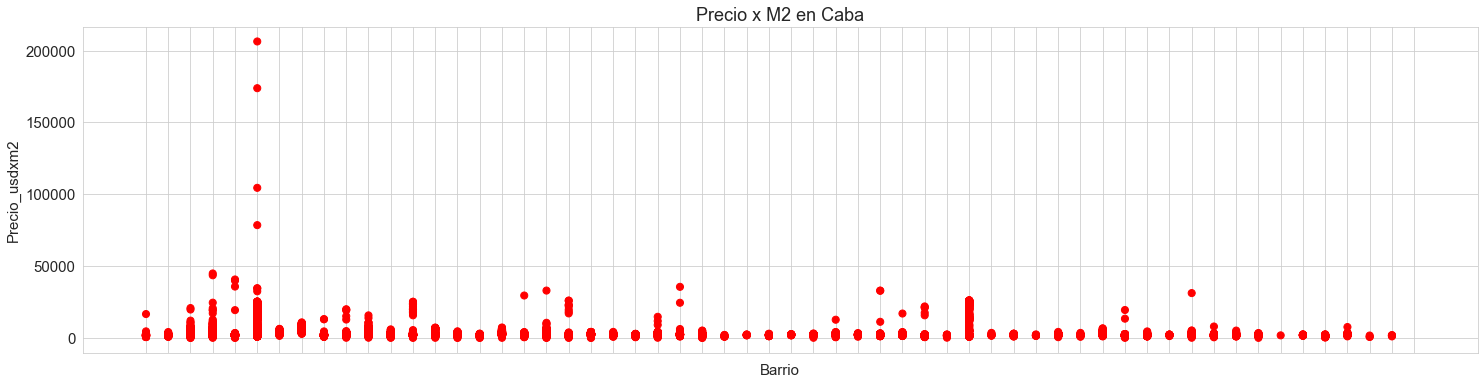

In [ ]:
#Miramos los datos
xp = dfclean4.plot.scatter(figsize=(25,6), x="Barrio", y="Precio_usdxm2", s = dfclean4["apartment"]* 50, c='red')
plt.title('Precio x M2 en Caba')
xp.set_xticklabels(xp.get_xticklabels(), rotation=68)
xp.set_xticklabels
xp

<bound method _AxesBase.set_xticklabels of <AxesSubplot:title={'center':'Recorte, Precio Max de Pto. Madero'}, xlabel='Barrio', ylabel='Precio_usdxm2'>>

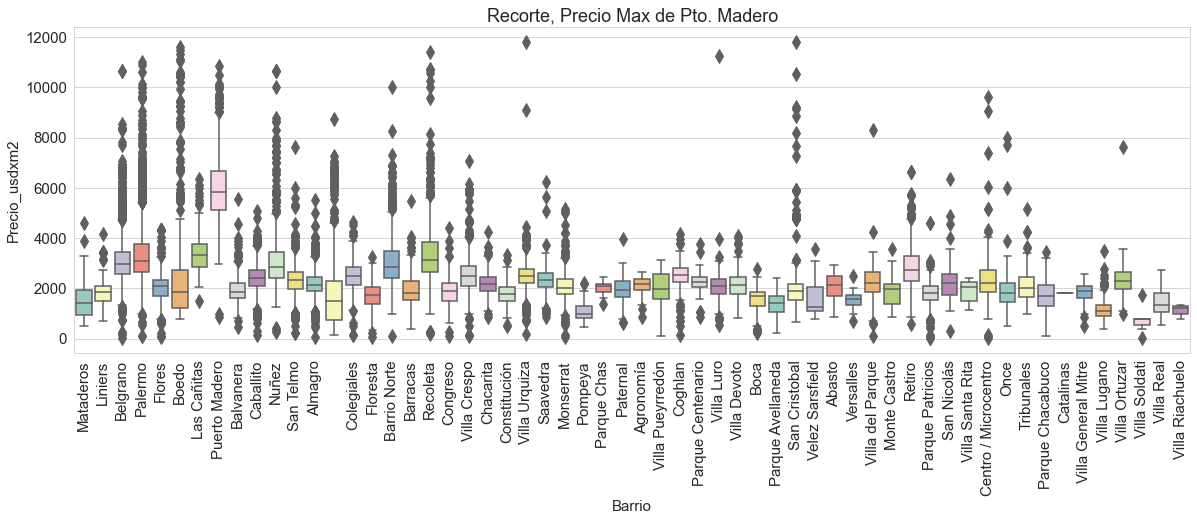

In [ ]:
##### tomamos como referencia el valor mas alto de puerto madero.
a = dfclean4.Precio_usdxm2 < 12000
y = dfclean4.Precio_usdxm2[a]
fig = plt.subplots(figsize=(20,6))
ax2 = sns.boxplot(x= "Barrio", y= y, data= dfclean4, fliersize  = 10, palette="Set3")
plt.title('Recorte, Precio Max de Pto. Madero')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_xticklabels

In [ ]:
#hacemos slice solo con el tipo de unidad que observamos
departamentos = dfclean4[dfclean4.Tipo_Propiedad == "apartment"]
#agrupamos x barrio ese tipo de unidad
grupod = departamentos.groupby(by = ["Tipo_Propiedad","Barrio"])
preciom2xbarrio = grupod ["Precio_usdxm2"].mean().sort_values(ascending = False).round(2)
print("Precio promedio x Barrio\n", preciom2xbarrio.head(10))

Precio promedio x Barrio
 Tipo_Propiedad  Barrio       
apartment       Boedo            11454.94
                San Cristobal    11012.20
                Puerto Madero     6065.32
                Las Cañitas       3490.97
                Palermo           3457.06
                Nuñez             3349.20
                Recoleta          3327.77
                Belgrano          3192.42
                Barrio Norte      3051.27
                Retiro            3036.55
Name: Precio_usdxm2, dtype: float64


In [ ]:
## Pegar el tratamiento de Precios de SanCristobal y Boedo!!!!!!

### **Trabajamos en Superficie**
1- Trabajamos completando valores en Superficie_total_m2           

C:\Users\mmontrasi\anaconda3\envs\dh\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


<AxesSubplot:title={'center':'Superficie x M2 en Caba'}, xlabel='Barrio', ylabel='Superficie_total_m2'>

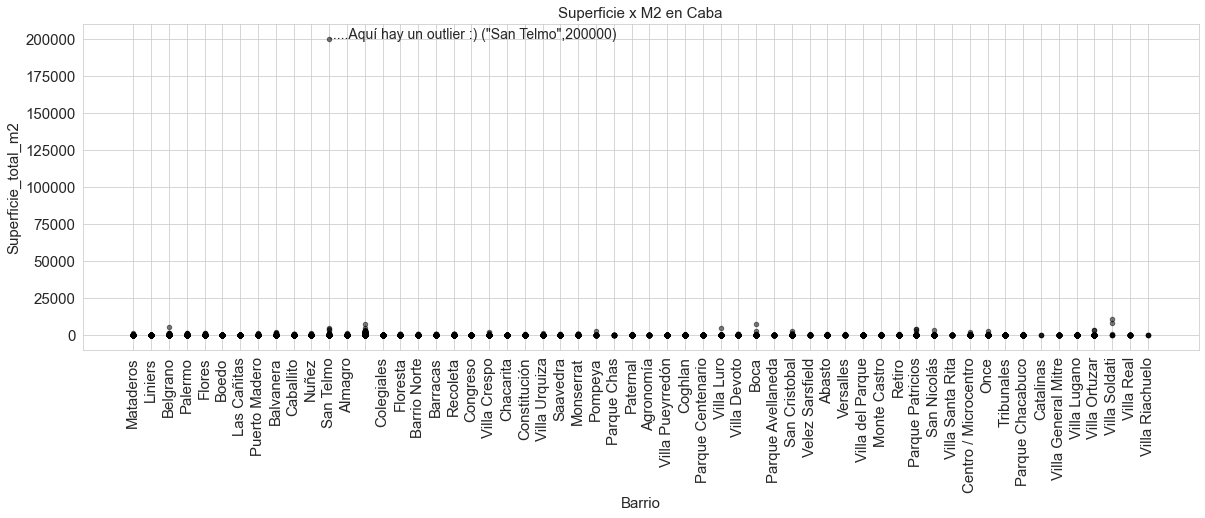

In [ ]:
#miramos un poco
xp2 = dfclean4.plot.scatter(figsize=(20,6), x="Barrio", y="Superficie_total_m2", c='k', alpha=0.5)
plt.title('Superficie x M2 en Caba', fontsize=15)
plt.text("San Telmo",200000,'.....Aquí hay un outlier :) ("San Telmo",200000)', fontsize=14)
xp2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
xp2.set_xticklabels
xp2

In [ ]:
#miramos los valores mas altos
dfclean4[["Tipo_Propiedad","Superficie_total_m2","Superficie_cubierta_m2"]].sort_values(by="Superficie_total_m2",ascending=False).head(14)

,Tipo_Propiedad,Superficie_total_m2,Superficie_cubierta_m2
5684,apartment,200000.0,NaN
18031,store,10958.0,10958.0
17599,store,8053.0,NaN
2532,house,7832.0,4111.0
17583,store,7722.0,7722.0
13670,apartment,5483.0,NaN
22905,store,5079.0,5079.0
17447,store,4800.0,4800.0
18027,store,4800.0,4800.0
17501,store,4590.0,4590.0


In [ ]:
#muestras >>
cantp = dfclean4.Superficie_total_m2 < 5000
cantp.sum(), dfclean4.shape

(26430, (32316, 67))

In [ ]:
# por outliers + registros inclompletos
dfclean4= dfclean4[cantp]
dfclean4.shape

(26430, 67)

In [ ]:
#hacemos slice solo con el tipo de unidad que observamos, apartment
separt = dfclean4[dfclean4.apartment == 1]
#agrupamos x sup ese tipo de unidad
gruposup = separt.groupby(by = ["Tipo_Propiedad","Barrio"])
m2xbarrio = gruposup["Superficie_total_m2"].mean().sort_values(ascending = False).round(2)
print("Superficie_total_m2 x Barrio\n", m2xbarrio.head(10))
##Boedo sigue pa la merd

Superficie_total_m2 x Barrio
 Tipo_Propiedad  Barrio       
apartment       Puerto Madero    149.06
                Catalinas        130.67
                Retiro           127.30
                Recoleta         121.22
                Villa Real       105.50
                Barrio Norte     102.50
                Las Cañitas       98.89
                Belgrano          95.27
                Nuñez             92.66
                Palermo           89.42
Name: Superficie_total_m2, dtype: float64


In [ ]:
#miramos promedios de superficie en deptos
aaa = dfclean4.apartment == 1
xz  = dfclean4[aaa]
print("Promedio Superficie_total_m2 de Departamentos en Caba",dfclean4.Superficie_total_m2.mean().round(2),"metros")

Promedio Superficie_total_m2 de Departamentos en Caba 109.98 metros


In [ ]:
cortesup = xz.loc[:, "Superficie_total_m2"] < 1000
xz.Superficie_total_m2 = xz.Superficie_total_m2[cortesup]
print("Promedio Superficie_total_m2 de Departamentos en Caba menores a 1000mts", xz.Superficie_total_m2.mean().round(2),"metros")

Promedio Superficie_total_m2 de Departamentos en Caba menores a 1000mts 78.5 metros


C:\Users\mmontrasi\anaconda3\envs\dh\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'Superficie de Apartments x M2 en Caba'}, xlabel='Barrio', ylabel='Superficie_total_m2'>

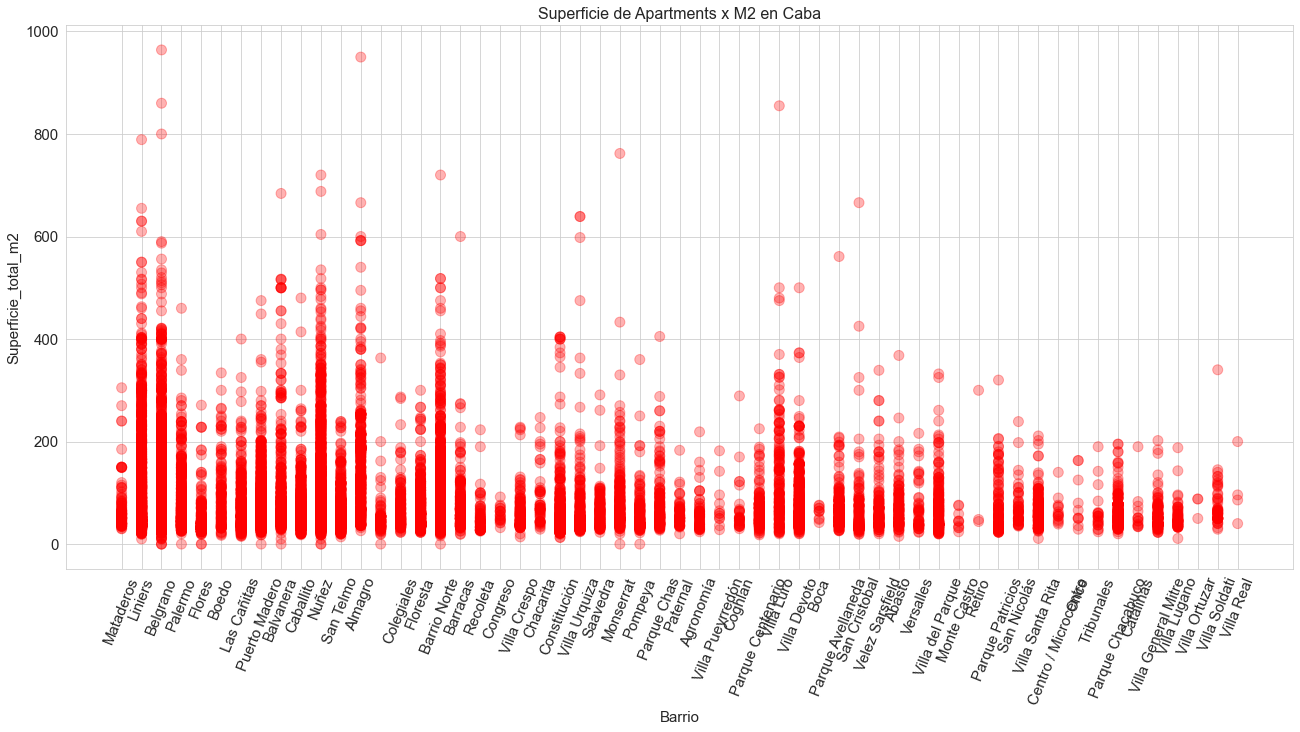

In [ ]:
xp3 = xz.plot.scatter(figsize=(22,10), x="Barrio", y="Superficie_total_m2",c='r', alpha=0.3, s = xz["apartment"]* 100)
plt.title('Superficie de Apartments x M2 en Caba', fontsize=16)
xp3.set_xticklabels(ax2.get_xticklabels(), rotation=68)
xp3.set_xticklabels
xp3

In [ ]:
#dropeamos col de conjunto ya en dumies
dfclean5 = dfclean4.drop(["Barrio", "Tipo_Propiedad", "Ambientes"], axis=1)
dfclean5.shape
dfclean5.reset_index(drop = True, inplace=True)

In [ ]:
#corroboramos valores faltantes de supTotal presentes en supCubierta
dfclean5.sample(15, random_state=587)

,Superficie_cubierta_m2,Superficie_total_m2,Precio_usdxm2,Precio_aprox_usd,apartment,house,store,Abasto,Agronomía,Almagro,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
23935,41.0,47.0,1980.851064,93100.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21550,145.0,165.0,3575.757576,590000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7490,122.0,134.0,2611.940299,350000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1309,177.0,182.0,5769.230769,1050000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1815,330.0,330.0,6060.606061,2000000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,48.0,48.0,1458.333333,70000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5614,33.0,33.0,1848.484848,61000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2298,29.0,33.0,2666.666667,88000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5621,105.0,105.0,1619.047619,170000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17070,100.0,115.0,2217.391304,255000.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Nulls?
dfclean5.Superficie_total_m2.isnull().sum(), dfclean5.Superficie_cubierta_m2.isnull().sum()

(0, 1550)

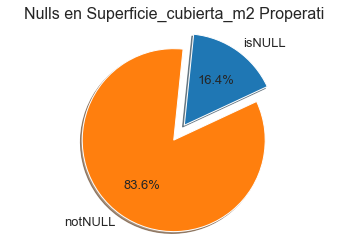

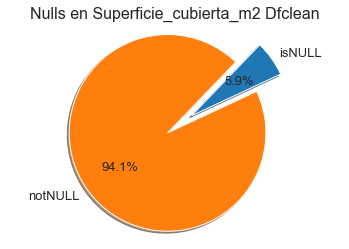

In [ ]:
plt.rcParams.update({'font.size': 13})
labels=("")
no = data["surface_covered_in_m2"].notnull().sum()
ni = data["surface_covered_in_m2"].isnull().sum()
nulls = [no, ni]
labels = 'isNULL', 'notNULL'
sizes = [ni, no]
explode = (0, 0.2)
fig1, ax8 = plt.subplots()
ax8.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=25)
ax8.axis('equal')
plt.title("Nulls en Superficie_cubierta_m2 Properati", fontsize=16)
# el otro
no = dfclean5["Superficie_cubierta_m2"].notnull().sum()
ni = dfclean5["Superficie_cubierta_m2"].isnull().sum()
nulls = [no, ni]
labels = 'isNULL', 'notNULL'
sizes = [ni, no]
explode = (0, 0.3)
fig1, ax8 = plt.subplots()
ax8.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=25)
ax8.axis('equal')
plt.title("Nulls en Superficie_cubierta_m2 Dfclean", fontsize=16)
plt.show()

In [ ]:
#Trabajamos completando valores en Superficie_cubierta_m2    
#Relleno los nulls de Supcub, con los valores de Suptotal, en nuevo dataframe

dfclean5.Superficie_cubierta_m2.fillna(value = dfclean5.Superficie_total_m2, inplace=True)
print("Nulls en Superficie_cubierta_m2 el data Original =", dfclean.Superficie_cubierta_m2.isnull().sum())
print("Nulls en Superficie_cubierta_m2 +fillna =",dfclean5.Superficie_cubierta_m2.isnull().sum())
dfclean.shape, dfclean5.shape #no modificamos cant. de filas.

Nulls en Superficie_cubierta_m2 el data Original = 2339
Nulls en Superficie_cubierta_m2 +fillna = 0


((32316, 7), (26430, 64))

In [ ]:
print("\nValido \n", "\nfila 299 antes del fill:\n",dfclean4.iloc[299, 3:5], "\n\nfila 299 reemplazda:\n", dfclean5.iloc[299, 0:2])


Valido 
 
fila 299 antes del fill:
 Superficie_cubierta_m2    NaN
Superficie_total_m2        97
Name: 394, dtype: object 

fila 299 reemplazda:
 Superficie_cubierta_m2    97.0
Superficie_total_m2       97.0
Name: 394, dtype: float64


In [ ]:
dfclean5 = dfclean4.drop(["Barrio", "Tipo_Propiedad", "Ambientes"], axis=1)
dfclean5.shape

(26430, 64)

In [ ]:
#Cantidad de Nulos
cant_nulos_por_campo = dfclean5.apply(lambda x: x.isnull().sum(), axis=0)
cant_registros = dfclean5.shape[0]
porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
porc_nulos_por_campo.round(2).sort_values(ascending=False).head(10)

Precio_usdxm2             11.36
Precio_aprox_usd          11.31
Superficie_cubierta_m2     5.86
Constitución               0.00
Centro / Microcentro       0.00
Chacarita                  0.00
Coghlan                    0.00
Colegiales                 0.00
Congreso                   0.00
Floresta                   0.00
dtype: float64

In [ ]:
#importar codigo

In [ ]:
#Decision de Negocio
dfclean6 = dfclean5.dropna()
print(dfclean5.shape)
print(dfclean6.shape) #dropeamos 1115 registros menos. :)

(26430, 64)
(22315, 64)


In [ ]:
dfclean6.describe()

,Superficie_cubierta_m2,Superficie_total_m2,Precio_usdxm2,Precio_aprox_usd,apartment,house,store,Abasto,Agronomía,Almagro,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
count,22315.000000,22315.000000,22315.000000,2.231500e+04,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,...,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000
mean,88.088057,110.090925,3135.722179,2.756635e+05,0.851983,0.057047,0.037015,0.003585,0.001076,0.036254,...,0.005243,0.011741,0.003406,0.005019,0.001210,0.000134,0.001210,0.000224,0.047591,0.015147
std,131.027126,183.379104,3755.293587,3.687069e+05,0.355125,0.231937,0.188804,0.059769,0.032778,0.186925,...,0.072221,0.107720,0.058261,0.070669,0.034764,0.011594,0.034764,0.014967,0.212905,0.122139
min,0.000000,10.000000,24.207190,5.103610e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,42.000000,1969.712121,1.061296e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,62.000000,2471.264368,1.600000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,95.000000,111.000000,3070.175439,2.950000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4800.000000,4800.000000,206333.333333,8.500000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dfclean6.shape

(22315, 64)

In [ ]:
cantidaddesvios = 2
limite = (dfclean6["Superficie_cubierta_m2"].mean()) + (dfclean6["Superficie_cubierta_m2"].std() * cantidaddesvios) 
mask1 = (dfclean6["Superficie_cubierta_m2"] < limite) 
dfclean7 = dfclean6.loc[mask1,:]
dfclean7.shape

(21795, 64)

In [ ]:
cantidaddesvios2 = 2
limite2 = (dfclean7["Superficie_total_m2"].mean()) + (dfclean7["Superficie_total_m2"].std() * cantidaddesvios2) 
mask2 = dfclean7["Superficie_total_m2"] < limite2
dfclean8 = dfclean7.loc[mask2,:]
dfclean8.shape

(21075, 64)

In [ ]:
cantidaddesvios3 = 2
limite3 = (dfclean8["Precio_usdxm2"].mean()) + (dfclean8["Precio_usdxm2"].std() * cantidaddesvios3) 
mask3 = dfclean8["Precio_usdxm2"] < limite3
dfclean9 = dfclean8.loc[mask3,:]
dfclean9.shape

(20445, 64)

In [ ]:
m2libres = dfclean9["Superficie_total_m2"] - dfclean9["Superficie_cubierta_m2"]
dfclean10 = pd.concat([dfclean9,m2libres],axis=1)
dfclean10
dfclean10 = dfclean10.rename(index=str, columns={0: "m2libres"})
dfclean10

,Superficie_cubierta_m2,Superficie_total_m2,Precio_usdxm2,Precio_aprox_usd,apartment,house,store,Abasto,Agronomía,Almagro,...,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,m2libres
0,40.0,55.0,1127.272727,62000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
1,55.0,55.0,1309.090909,72000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,40.0,45.0,3066.666667,138000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
4,60.0,65.0,3000.000000,195000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
5,30.0,50.0,2234.000000,111700.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32309,35.0,38.0,3368.421053,128000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
32310,39.0,44.0,3750.000000,165000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
32313,93.0,113.0,7699.115044,870000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.0
32314,39.0,46.0,2858.695652,131500.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7.0


In [ ]:
feature_cols = ['Superficie_cubierta_m2', 'Superficie_total_m2', "apartment", "house", "store","Palermo",
                "Belgrano","Caballito", "Recoleta", "Villa Urquiza","Recoleta","Flores", "Villa Crespo", "San Telmo", 
                "Barrio Norte", "Boedo", "Nuñez", "Balvanera", "Puerto Madero", "San Cristobal", "Saavedra",
               "Monserrat", "Floresta", "Villa del Parque", "Villa Luro", "Barracas", "Mataderos",
               "Liniers","m2libres", "Boedo", "San Cristobal"]


In [ ]:
dfclean10.shape

(20445, 65)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


X = dfclean10[feature_cols]
y = dfclean10.Precio_usdxm2

#instanciamos y entrenamos el modelo
linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

1674.9358242511173
[ 3.99872265e+00 -2.31810090e+00  5.87016145e+02 -7.43315827e+01
  8.97580528e+02  1.04645228e+03  8.76219424e+02  1.85631736e+02
  4.99273371e+02  2.71747371e+02  4.99273371e+02 -1.95336621e+02
  2.76662920e+02  7.18178014e+01  7.50057083e+02  2.73991076e+02
  7.66607976e+02 -3.47467011e+02  3.55914224e+03  6.36501485e+01
  2.19791231e+02 -1.97234357e+02 -3.41456973e+02  1.11321830e+02
 -1.25241322e+02 -2.64452745e+02 -2.83959875e+02 -1.86938763e+02
 -6.31682355e+00  2.73991076e+02  6.36501485e+01]


In [ ]:
from sklearn.model_selection import train_test_split

def train_test_error(feature_cols):
    X = dfclean10[feature_cols]
    y = dfclean10.Precio_usdxm2
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ("y_test sample: ",y_test.values[0:10])
    print ("y_pred sample: ",y_pred[0:10].astype(int))
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [ ]:
train_test_error(['Superficie_cubierta_m2', 'Superficie_total_m2', "apartment", "house", "store","Palermo",
                "Belgrano","Caballito", "Recoleta", "Villa Urquiza","Recoleta","Flores", "Villa Crespo", "San Telmo", 
                "Barrio Norte", "Boedo", "Nuñez", "Balvanera", "Puerto Madero", "San Cristobal", "Saavedra",
               "Monserrat", "Floresta", "Villa del Parque", "Villa Luro", "Barracas", "Mataderos",
               "Liniers","m2libres", "Boedo", "San Cristobal"])

['Superficie_cubierta_m2', 'Superficie_total_m2', 'apartment', 'house', 'store', 'Palermo', 'Belgrano', 'Caballito', 'Recoleta', 'Villa Urquiza', 'Recoleta', 'Flores', 'Villa Crespo', 'San Telmo', 'Barrio Norte', 'Boedo', 'Nuñez', 'Balvanera', 'Puerto Madero', 'San Cristobal', 'Saavedra', 'Monserrat', 'Floresta', 'Villa del Parque', 'Villa Luro', 'Barracas', 'Mataderos', 'Liniers', 'm2libres', 'Boedo', 'San Cristobal']
y_test sample:  [2879.31034483 1500.         1800.         2823.52941176 2258.90410959
 3815.78947368 2051.35594595 1947.36842105 2184.87394958 1089.74358974]
y_pred sample:  [2552 2100 2413 2625 3218 3129 2077 2576 2745 2264]
MAE: 556.0898015059807
MSE: 714207.6687242282
RMSE: 845.1080810903586
R2: 0.4151698814854643



In [ ]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [ ]:
X = dfclean10[feature_cols]
y = dfclean10.Precio_usdxm2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

print('Score model_1:', model_1.score(X_test, y_test))

Score model_1: 0.41241816658465935


In [ ]:
#plt.plot(X, y, color='green')
#plt.show()

In [ ]:
lm_ridge = linear_model.RidgeCV(alphas=[0.1, 1, 10], normalize=True) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)

print('Score model_train:', model_2.score(X_train, y_train))

Score model_train: 0.40760349144728814


In [ ]:
lm_ridge = linear_model.RidgeCV(alphas=[0.1, 1, 10], normalize=True) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)

print('Score model_2:', model_2.score(X_test, y_test))

Score model_2: 0.406241622329198


In [ ]:

lasso = linear_model.Lasso(alpha=0.5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
X = dfclean10[feature_cols]
y = dfclean10.Precio_usdxm2
lasso_model =lasso.fit(X, y)
predictions = lasso_model.predict(X)

print ("Score model_3:", lasso_model.score(X, y))

Score model_3: 0.34696826049019824


In [ ]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# De manera análoga a la vista en el primer ejercicio, definimos el vector de variables con la primer variable RM.

X = dfclean10[feature_cols]
y = dfclean10.Precio_usdxm2

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

EMC: 757265.8248204747
                            OLS Regression Results                            
Dep. Variable:          Precio_usdxm2   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     532.8
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:04:35   Log-Likelihood:            -1.6740e+05
No. Observations:               20445   AIC:                         3.348e+05
Df Residuals:                   20417   BIC:                         3.351e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const

## Cross validation

In [ ]:
from sklearn.model_selection import train_test_split

def train_test_error(feature_cols):
    X = dfclean10[feature_cols]
    y = dfclean10.Precio_usdxm2
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ("y_test sample: ",y_test.values[0:10])
    print ("y_pred sample: ",y_pred[0:10].astype(int))
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 



#hacemos corss validation para ver como predice el modelo 
from sklearn.model_selection import cross_val_score

# La ejecutamos indicando como estimador una regresión lineal, especificando el set de train y cuántos folds queremos
cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=3)

array([0.39400482, 0.43248969, 0.39599017])

In [ ]:
cv_scores_mean = []

for i in range(X_train.shape[1]):
    estimator = LinearRegression()
    cv_score = cross_val_score(estimator, X_train.iloc[:, :i+1], y_train, cv=3)
    cv_scores_mean.append(cv_score.mean())
    
cv_scores_mean = []

for i in range(X_train.shape[1]):
    estimator = LinearRegression()
    cv_score = cross_val_score(estimator, X_train.iloc[:, :i+1], y_train, cv=3)
    cv_scores_mean.append(cv_score.mean())    

In [ ]:
m100 = dfclean10.sample(n=100)
m100.isnull().sum(), m100.shape
m100.reset_index(drop = True, inplace=True)
m100.shape
m100.head()

,Superficie_cubierta_m2,Superficie_total_m2,Precio_usdxm2,Precio_aprox_usd,apartment,house,store,Abasto,Agronomía,Almagro,...,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,m2libres
0,63.0,81.0,1419.753086,115000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.0
1,65.0,151.0,1059.602649,160000.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,86.0
2,140.0,190.0,1842.105263,350000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50.0
3,48.0,50.0,2800.000000,140000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
4,60.0,65.0,2692.307692,175000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0


### Graficos para presentación

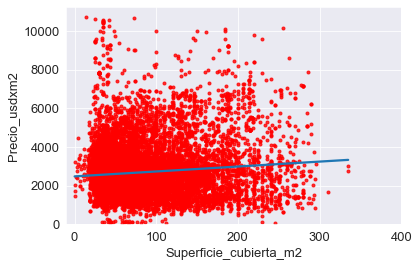

In [ ]:
sns.regplot(dfclean10.Superficie_cubierta_m2, dfclean10.Precio_usdxm2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,400)
plt.ylim(bottom=0);

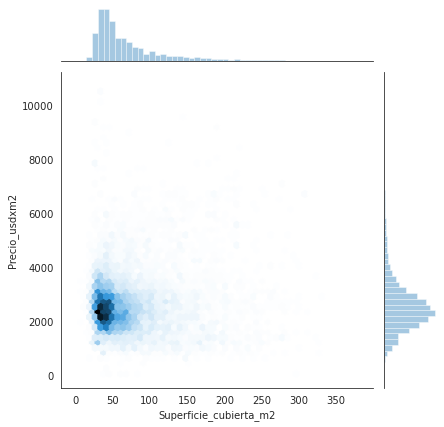

In [ ]:
%matplotlib inline
with sns.axes_style('white'):
    g = sns.jointplot("Superficie_cubierta_m2", "Precio_usdxm2", dfclean10, kind='hex')
    #g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k');

C:\Users\mmontrasi\anaconda3\envs\dh\lib\site-packages\seaborn\axisgrid.py:98: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000024A6EE4D3C8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


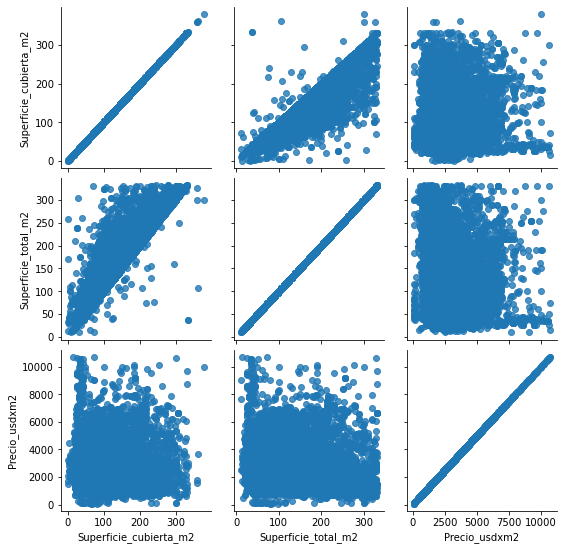

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(dfclean10, vars=['Superficie_cubierta_m2', 'Superficie_total_m2', 'Precio_usdxm2'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

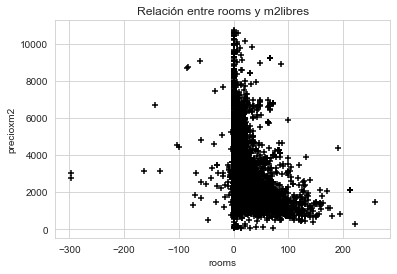

In [ ]:
X = dfclean10["m2libres"]
y= dfclean10["Precio_usdxm2"]
plt.scatter(X, y, s=30, c='black', marker='+', zorder=10)
plt.xlabel("rooms")
plt.ylabel("precioxm2")
plt.title('Relación entre rooms y m2libres')
plt.show()

## * HIPOTESIS DE Trabajamos en Rooms completa de regex* NAIVES PARA PRECEDIR

In [ ]:
#importamos todas las librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importamos datos
data_location = "../Data/g6_limpio_final.csv"
#data_location = "../Data/properati.csv"
data = pd.read_csv(data_location)

In [ ]:
data.surface_covered_in_m2.fillna(value = data.surface_total_in_m2, inplace=True)

In [ ]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [ ]:
#simulamos naive para buscar completar los datos rooms en base a superficie

In [ ]:
data.surface_covered_in_m2.dropna(inplace=True), data.surface_covered_in_m2.shape

(None, (108851,))

In [ ]:
#slice de columnas, preparo la data con valores conocidos
data_cap3 = data.loc[:,["surface_covered_in_m2", "rooms"]]
data_cap4 = data_cap3.dropna()
data_cap4.shape

(43151, 2)

In [ ]:
#Importamos Naives
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

#definimos variables
X = data_cap4.drop('surface_covered_in_m2', axis=1)
y = data_cap4['rooms']

In [ ]:
#Definimos entrenamiento
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 1237)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(30205, 1)
(12946, 1)
(30205,)
(12946,)


In [ ]:
#corremos el modelo
model.fit(Xtrain, ytrain)

GaussianNB()

In [ ]:
#predecimos test
ypred = model.predict(Xtest)
ypred

array([ 323.,  323., 1600., ...,   19.,   19., 1600.])

In [ ]:
Xtest

,rooms
38345,5.0
51494,5.0
9897,3.0
9910,1.0
32104,2.0
...,...
48058,1.0
5630,2.0
60470,1.0
24958,1.0


In [ ]:
#alculemos accuracy sobre el conjunto de test:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.0004634636181059787

In [ ]:
#cantidad de registros de dataset con rooms y metros
data_cap3.shape, 
data_cap3.rooms.isnull().sum() #cantidad de registros

73830

In [ ]:
data_cap3.surface_covered_in_m2.dropna(inplace=True), data_cap3.surface_covered_in_m2.shape

(None, (108851,))

In [ ]:
mask = data_cap3.rooms.isnull()
nose = data_cap3.surface_covered_in_m2[mask]
nose.astype(int)
nose.head()

0    40.0
2    55.0
4    35.0
5    53.0
6    78.0
Name: surface_covered_in_m2, dtype: float64

In [ ]:
a = nose
b = a.values.reshape(-1, 1)
b.shape

(65700, 1)

In [ ]:
#predecimos nose
ypred = model.predict(b)
a = ypred

In [ ]:
data_cap4.sort_values(by = "rooms",ascending=False)
data_cap4.rooms.isnull().sum()

#final 

0